In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk

from nltk.corpus import stopwords


from nltk.stem.porter import PorterStemmer


from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('fake_job_postings.csv')

In [4]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,0,1,0,Other,Internship,0,0,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,0,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",0,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,0,1,0,0,0,0,0,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",0,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
df.tail()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,0,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,0,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,0,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",0,0,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,0,0,0,0,Full-time,0,0,0,0,0
17878,17879,Graphic Designer,"NG, LA, Lagos",0,0,0,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,0,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,0,0,1,1,Full-time,Mid-Senior level,0,Computer Software,Engineering,0


In [6]:
df.shape

(17880, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17880 non-null  object
 3   department           17880 non-null  object
 4   salary_range         17880 non-null  object
 5   company_profile      17880 non-null  object
 6   description          17880 non-null  object
 7   requirements         17880 non-null  object
 8   benefits             17880 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      17880 non-null  object
 13  required_experience  17880 non-null  object
 14  required_education   17880 non-null  object
 15  industry             17880 non-null  object
 16  func

In [8]:
df = df.drop(columns=['job_id'])

In [9]:
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,0,1,0,Other,Internship,0,0,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,0,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",0,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,0,1,0,0,0,0,0,0,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",0,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [10]:
df.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


# Removing Duplicates

In [11]:
df.duplicated().sum()

281

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

# making dataframe for categorical col and num col

In [14]:
df.select_dtypes(include='object').columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')

In [15]:
df.select_dtypes(include='object')

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,Other,Internship,0,0,Marketing
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,0,Marketing and Advertising,Customer Service
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",0,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,0,0,0,0,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,Bill Review Manager,"US, FL, Fort Worth",0,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,0,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,Full-time,Mid-Senior level,0,Computer Software,Sales
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,0,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",0,0,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,0,Full-time,0,0,0,0
17878,Graphic Designer,"NG, LA, Lagos",0,0,0,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,Contract,Not Applicable,Professional,Graphic Design,Design


In [16]:
object_columns_df = df.select_dtypes(include='object')

In [17]:
object_columns_df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,Other,Internship,0,0,Marketing
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,0,Marketing and Advertising,Customer Service
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",0,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,0,0,0,0,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,Bill Review Manager,"US, FL, Fort Worth",0,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider


In [18]:
df.select_dtypes(include='number').columns

Index(['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent'], dtype='object')

In [19]:
df.select_dtypes(include='number')

,telecommuting,has_company_logo,has_questions,fraudulent
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,1,0
...,...,...,...,...
17875,0,1,1,0
17876,0,1,1,0
17877,0,0,0,0
17878,0,0,1,0


In [20]:
int_columns_df = df.select_dtypes(include='number')

In [21]:
int_columns_df.head()

,telecommuting,has_company_logo,has_questions,fraudulent
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,1,0


# Making dataframe for fake job posting // real job posting

In [22]:
fake = df[df['fraudulent'] == 1]

In [23]:
fake.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,Forward Cap.,0,0,0,0,The group has raised a fund for the purchase o...,0,0,0,0,0,0,0,0,0,0,1
173,Technician Instrument & Controls,US,Power Plant & Energy,0,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
180,Sales Executive,"PK, SD, Karachi",Sales,0,0,Sales Executive,Sales Executive,Sales Executive,0,0,0,0,0,0,0,Sales,1
215,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1


In [24]:
real = df[df['fraudulent'] == 0]

In [25]:
real.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,0,1,0,Other,Internship,0,0,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,0,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",0,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,0,1,0,0,0,0,0,0,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",0,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [26]:
df['fraudulent'].value_counts()

0    16743
1      856
Name: fraudulent, dtype: int64

In [27]:
fake.shape

(856, 17)

In [28]:
real.shape

(16743, 17)

In [29]:
df.shape

(17599, 17)

  ## EDA
  ### Data Visualisation

In [30]:
fraudulent_count = df['fraudulent'].value_counts()

### We have used rainbow color palette by visualisation we can see the count of fraudulent and non fraudulent data

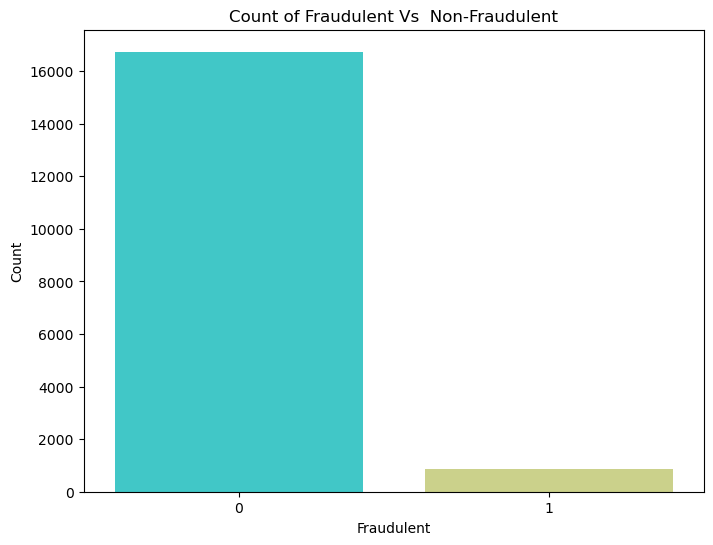

In [31]:
plt.figure(figsize=(8, 6))
sns.barplot(x=fraudulent_count.index, y=fraudulent_count.values, palette='rainbow')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.title('Count of Fraudulent Vs  Non-Fraudulent')
plt.show()

We have used magma palette by visualisation we can see the count of telecommuting and non-telecommuting data

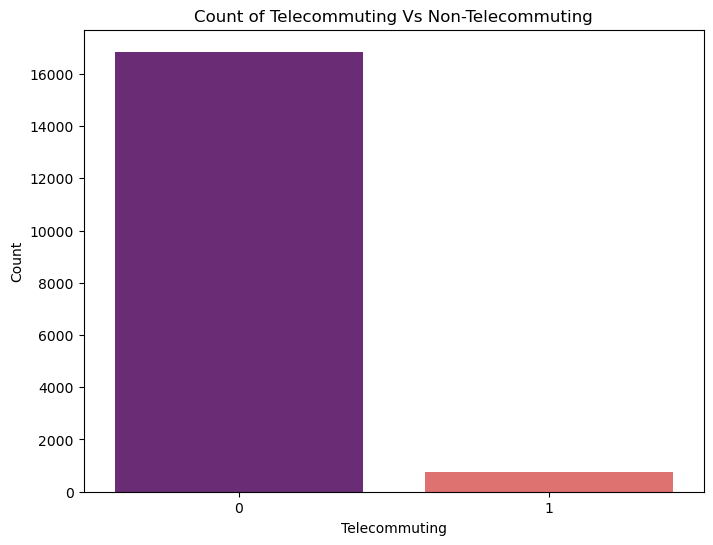

In [32]:
telecommuting_counts = df['telecommuting'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=telecommuting_counts.index, y=telecommuting_counts.values, palette='magma')
plt.xlabel('Telecommuting')
plt.ylabel('Count')
plt.title('Count of Telecommuting Vs Non-Telecommuting')
plt.show()

### We have used color palette by visualisation we can see the count of with_logo and  without_logo data

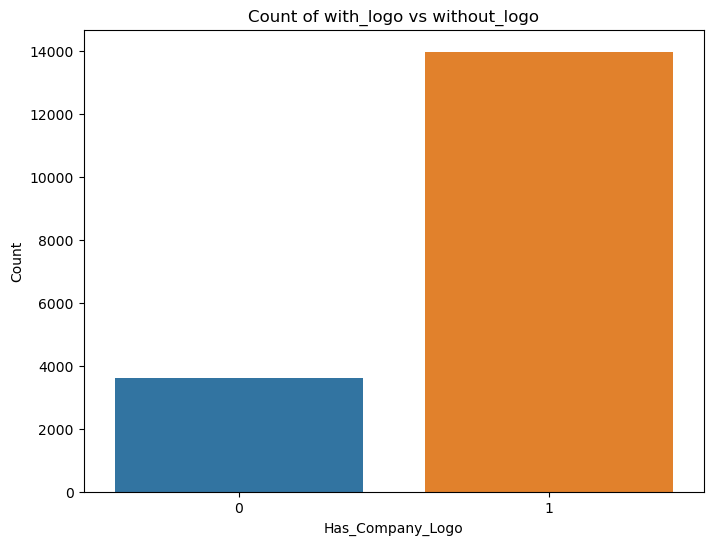

In [33]:
has_company_logo_counts = df['has_company_logo'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=has_company_logo_counts.index, y=has_company_logo_counts.values)
plt.xlabel('Has_Company_Logo')
plt.ylabel('Count')
plt.title('Count of with_logo vs without_logo')
plt.show()


We have used  color cividis by visualisation we can see the count of Ouestions and non No_Questions data

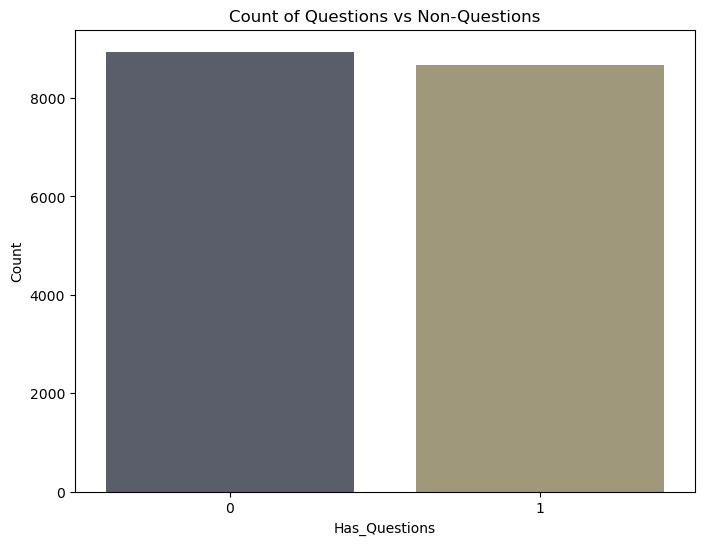

In [34]:
has_questions_counts = df['has_questions'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=has_questions_counts.index, y=has_questions_counts.values, palette='cividis')
plt.xlabel('Has_Questions')
plt.ylabel('Count')
plt.title('Count of Questions vs Non-Questions')
plt.show()


We have used pastel color palette by visualisation we can see the count of employment_type data

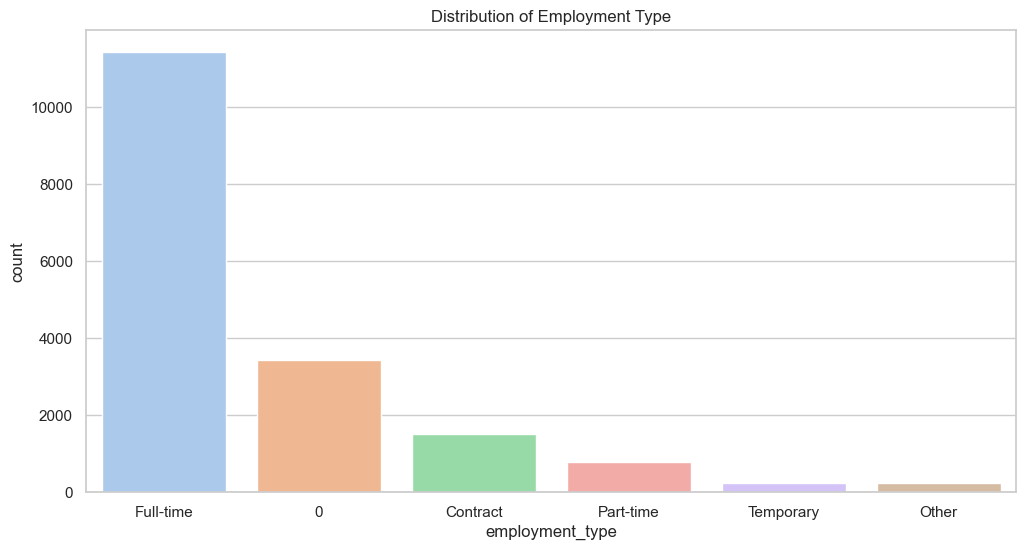

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='employment_type', data=df, palette='pastel', order=df['employment_type'].value_counts().index)

plt.title('Distribution of Employment Type')

plt.show()

We have used viridis color palette by visualisation we can see the count of Distribution of required_experience data

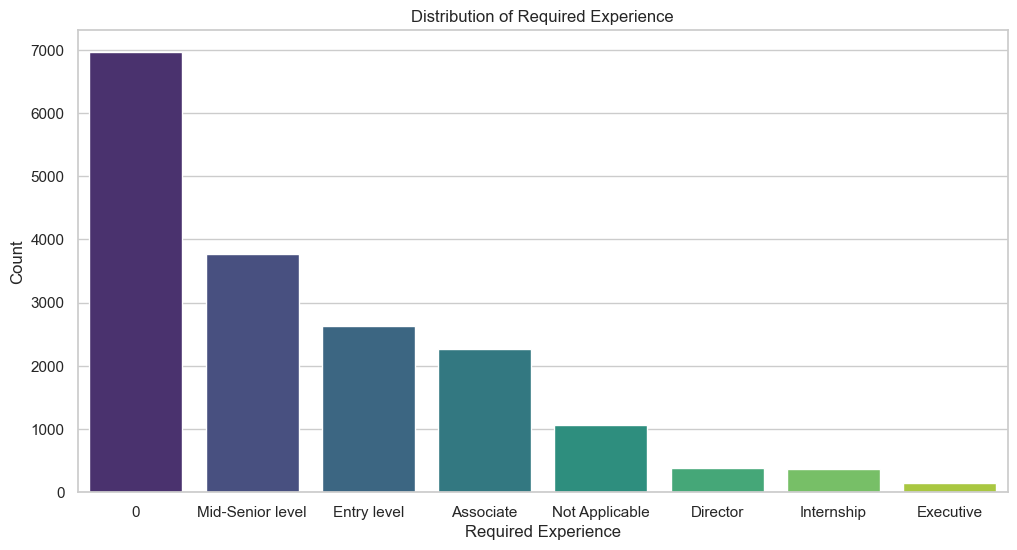

In [36]:
required_experience_counts = df['required_experience'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=required_experience_counts.index, y=required_experience_counts.values, palette='viridis')
plt.xlabel('Required Experience')
plt.ylabel('Count')
plt.title('Distribution of Required Experience')
plt.show()

We have used rainbow color palette by visualisation we can see the count of distribution of required_education data

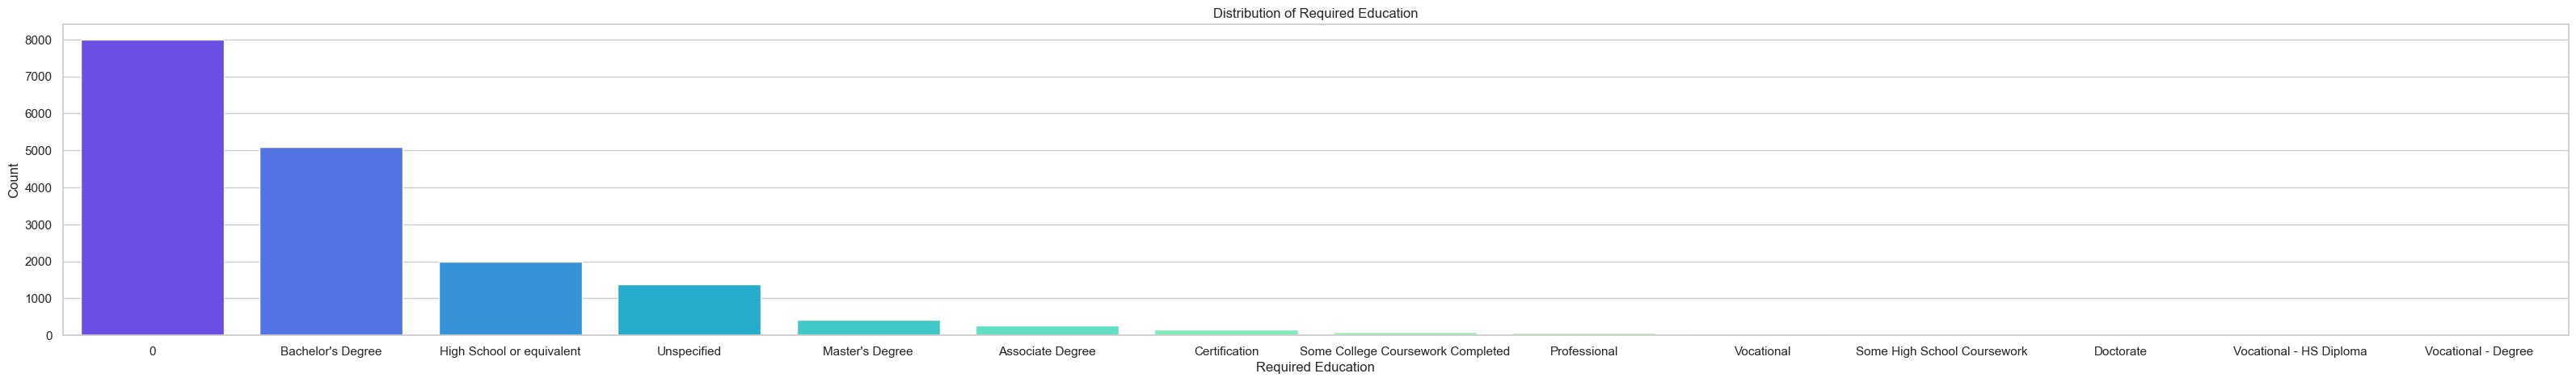

In [37]:
required_education_counts = df['required_education'].value_counts()

plt.figure(figsize=(40, 5))
sns.barplot(x=required_education_counts.index, y=required_education_counts.values, palette='rainbow')
plt.xlabel('Required Education')
plt.ylabel('Count')
plt.title('Distribution of Required Education')
plt.show()

We have used magma color palette by visualisation we can see the count of top 20 most frequent departments data

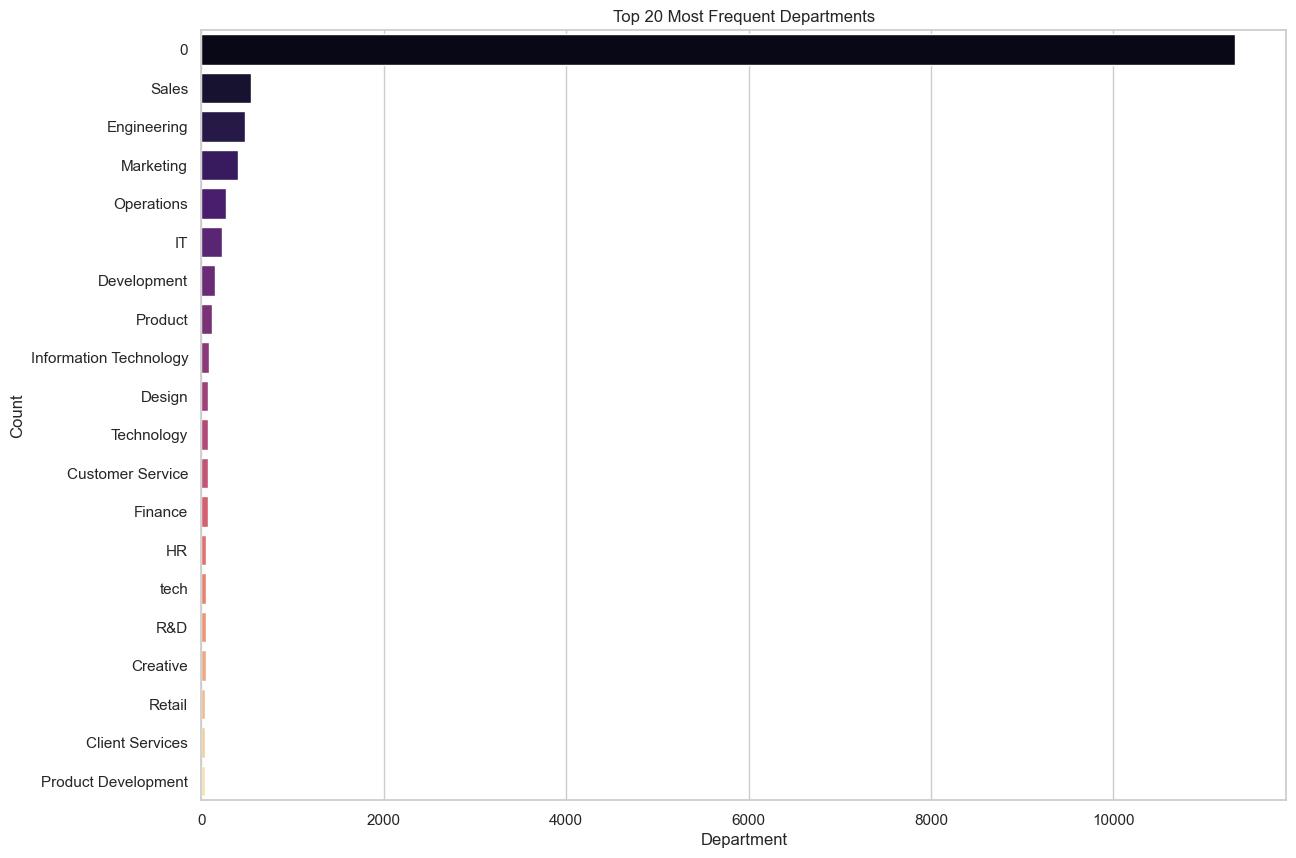

In [38]:
department_counts = df['department'].value_counts()

top_20_departments = department_counts.head(20)

plt.figure(figsize=(14, 10))
sns.barplot(y=top_20_departments.index, x=top_20_departments.values, palette='magma')
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Top 20 Most Frequent Departments')
plt.show()

### We have used rainbow color palette by visualisation we can see the count of top 20 most frequent industries data

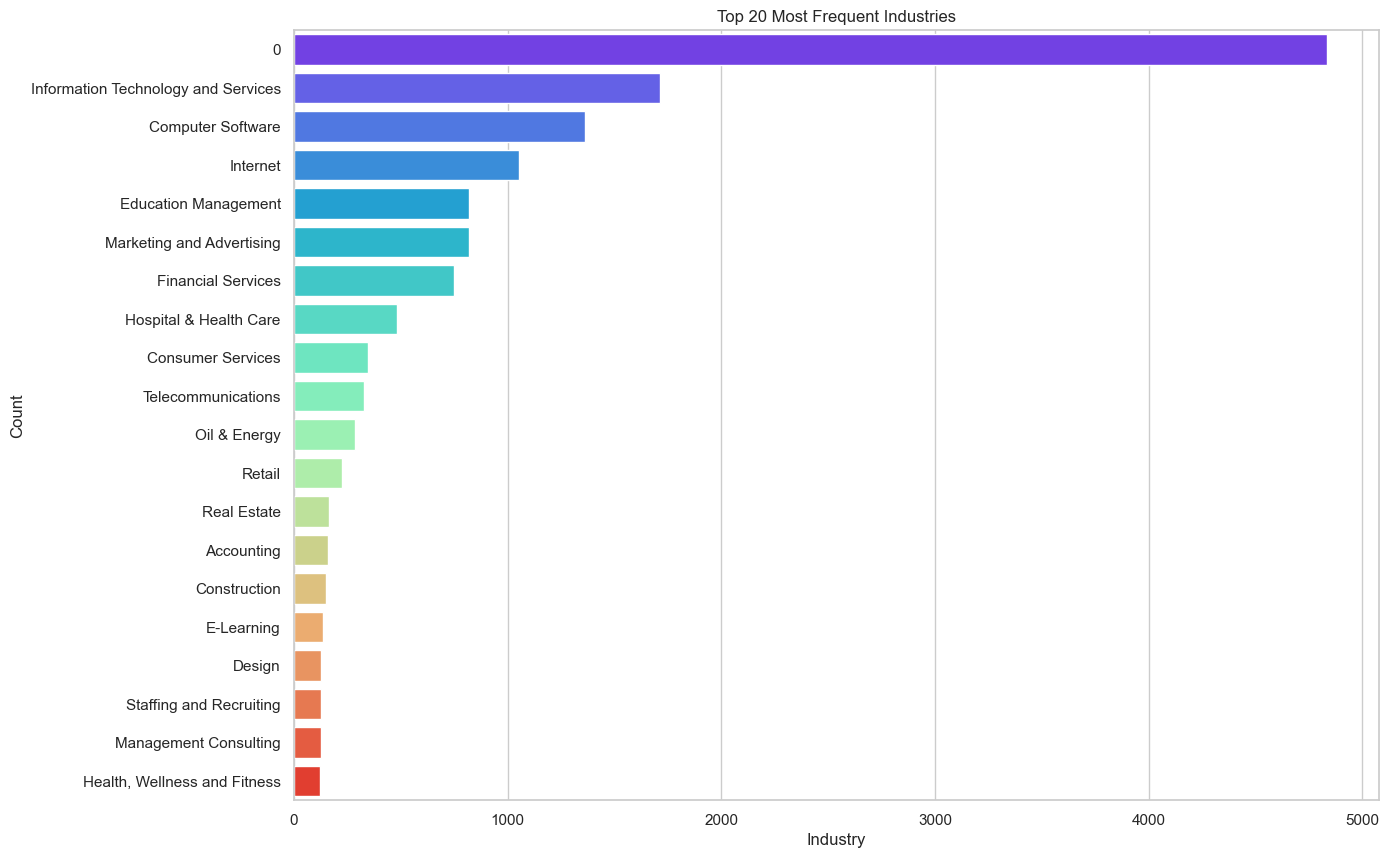

In [39]:
industry_counts = df['industry'].value_counts()

top_20_industry = industry_counts.head(20)

plt.figure(figsize=(14, 10))
sns.barplot(y=top_20_industry.index, x=top_20_industry.values, palette='rainbow')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Top 20 Most Frequent Industries')
plt.show()

 ### We have used rainbow color palette by visualisation we can see the count of top 10 most frequent function data

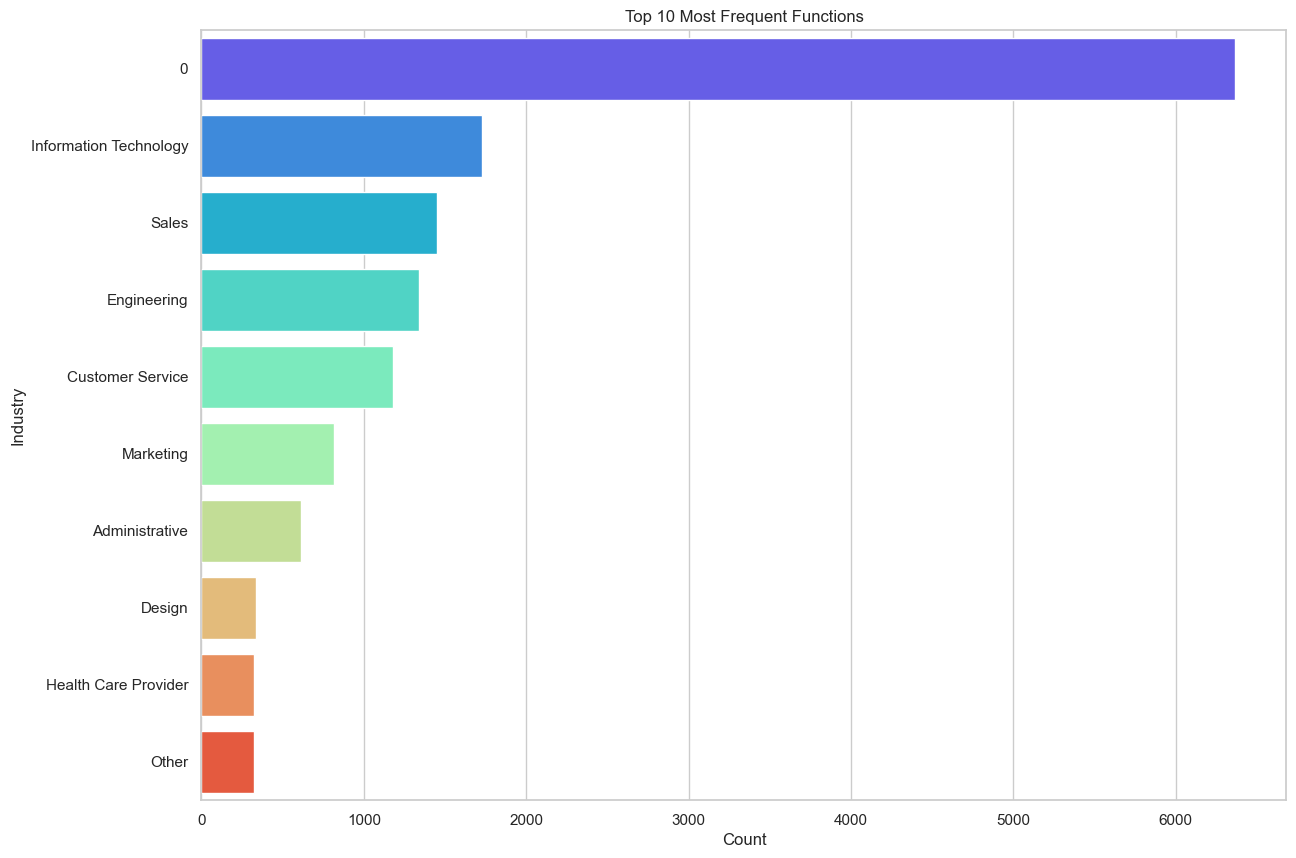

In [40]:
function_counts = df['function'].value_counts()

top_10_function = function_counts.head(10)

plt.figure(figsize=(14, 10))
sns.barplot(y=top_10_function.index, x=top_10_function.values, palette = 'rainbow')
plt.ylabel('Industry')
plt.xlabel('Count')
plt.title('Top 10 Most Frequent Functions')
plt.show()

# We will split the location column into separte columns for country and city

In [41]:
location_split = df['location'].str.split(',', expand=True)
df['country'] = location_split[0]
df['city'] = location_split[1]

In [42]:
df.head(2)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,city
0,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,0,1,0,Other,Internship,0,0,Marketing,0,US,NY
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,0,Marketing and Advertising,Customer Service,0,NZ,


We have used  color palette viridis by visualisation we can see the count of Top 10 Most Frequent Country data

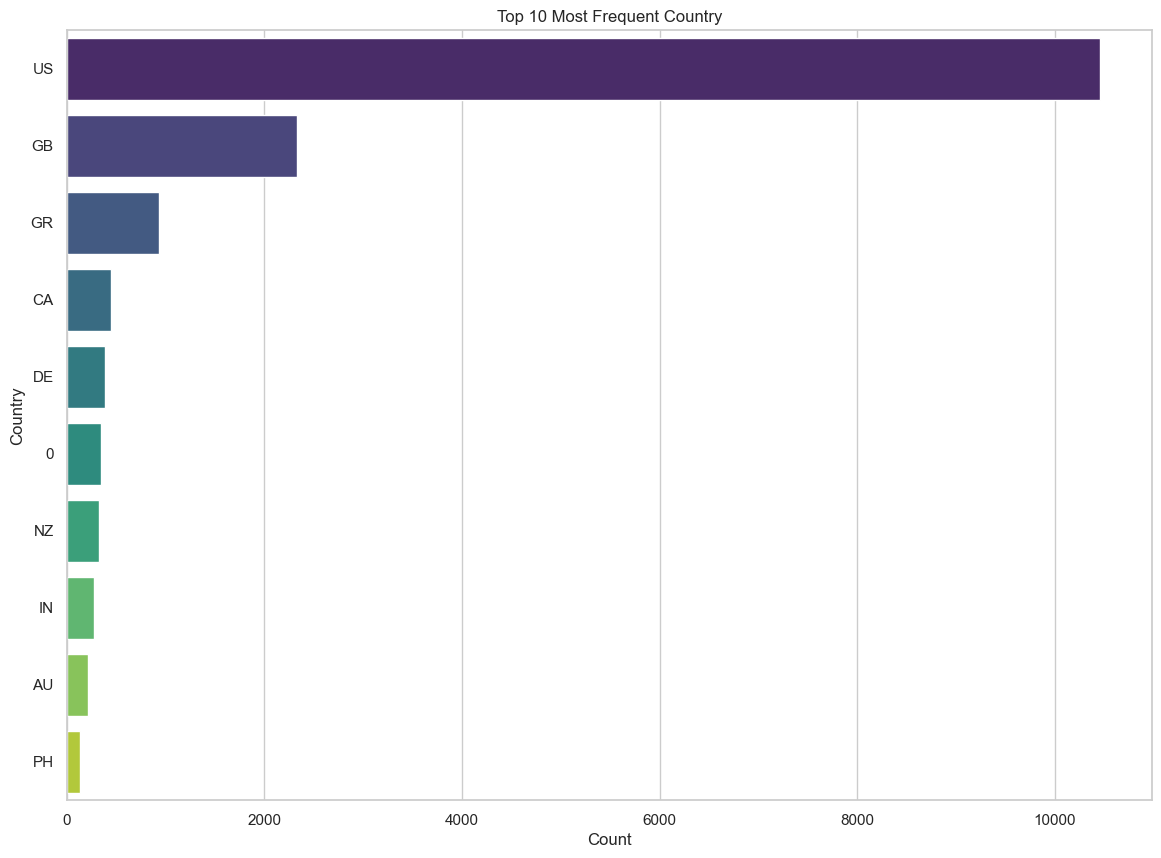

In [43]:
Country_counts = df['country'].value_counts()

top_10_Country = Country_counts.head(10)

plt.figure(figsize=(14, 10))
sns.barplot(y=top_10_Country.index, x=top_10_Country.values, palette='viridis')
plt.ylabel('Country')
plt.xlabel('Count')
plt.title('Top 10 Most Frequent Country')
plt.show()

We have used rainbow color palette by visualisation we can see the count of Top 10 Most Frequent City data

<module 'matplotlib.pyplot' from 'C:\\Users\\lenovo\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

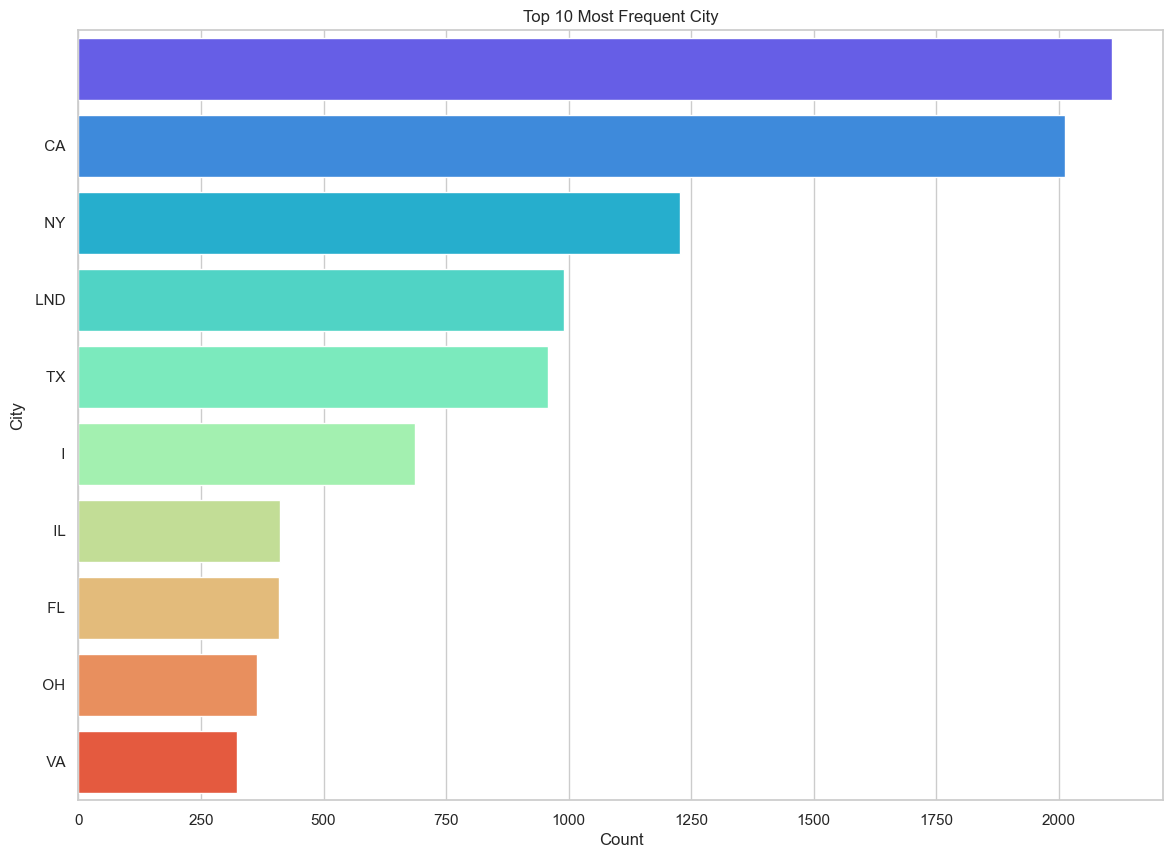

In [44]:
City_counts = df['city'].value_counts()

top_10_City = City_counts.head(10)

plt.figure(figsize=(14, 10))
sns.barplot(y=top_10_City.index, x=top_10_City.values, palette='rainbow')
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Top 10 Most Frequent City')
plt

In [45]:
df

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,city
0,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,0,1,0,Other,Internship,0,0,Marketing,0,US,NY
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,0,Marketing and Advertising,Customer Service,0,NZ,
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",0,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,0,1,0,0,0,0,0,0,0,US,IA
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC
4,Bill Review Manager,"US, FL, Fort Worth",0,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,0,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,0,Computer Software,Sales,0,CA,ON
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,0,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US,PA
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",0,0,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,0,0,0,0,Full-time,0,0,0,0,0,US,TX
17878,Graphic Designer,"NG, LA, Lagos",0,0,0,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,NG,LA


In [46]:
df.isnull().sum()

title                    0
location                 0
department               0
salary_range             0
company_profile          0
description              0
requirements             0
benefits                 0
telecommuting            0
has_company_logo         0
has_questions            0
employment_type          0
required_experience      0
required_education       0
industry                 0
function                 0
fraudulent               0
country                  0
city                   432
dtype: int64

# We will fill the null-values with space -> ' '

In [47]:
df.fillna(' ', inplace=True)

In [48]:
df.isnull().sum()

title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country                0
city                   0
dtype: int64

In [49]:
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,city
0,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,0,1,0,Other,Internship,0,0,Marketing,0,US,NY
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,0,Marketing and Advertising,Customer Service,0,NZ,
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",0,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,0,1,0,0,0,0,0,0,0,US,IA
3,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC
4,Bill Review Manager,"US, FL, Fort Worth",0,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL


# concatenating the needed object columns for job posting in one  column

In [50]:
columns_to_concat = ['title','location','department','salary_range','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function']

df['job_posting'] = df[columns_to_concat].apply(lambda x: ' '.join(x), axis=1)

new_df = df[['job_posting','fraudulent']].copy()

In [51]:
new_df.head(10)

,job_posting,fraudulent
0,"Marketing Intern US, NY, New York Marketing 0 ...",0
1,"Customer Service - Cloud Video Production NZ, ...",0
2,"Commissioning Machinery Assistant (CMA) US, IA...",0
3,"Account Executive - Washington DC US, DC, Wash...",0
4,"Bill Review Manager US, FL, Fort Worth 0 0 Spo...",0
5,"Accounting Clerk US, MD, 0 0 0 Job OverviewAp...",0
6,"Head of Content (m/f) DE, BE, Berlin ANDROIDPI...",0
7,"Lead Guest Service Specialist US, CA, San F...",0
8,"HP BSM SME US, FL, Pensacola 0 0 Solutions3 is...",0
9,"Customer Service Associate - Part Time US, AZ...",0


### We will clean the data using NLP

In [52]:
def preprocess_text(text):
  text = text.lower()
  text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTTLINE)
  text = re.sub(r'\d', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

  stop_words = set(stopwords.words('english'))
  words =  [word for word in text.split() if word not in stop_words]
  text = ' '.join(words)

  return text

  new_df['job_posting'] = new_df['job_posting'].apply(preprocess_text)

In [53]:
new_df.head(10)

,job_posting,fraudulent
0,"Marketing Intern US, NY, New York Marketing 0 ...",0
1,"Customer Service - Cloud Video Production NZ, ...",0
2,"Commissioning Machinery Assistant (CMA) US, IA...",0
3,"Account Executive - Washington DC US, DC, Wash...",0
4,"Bill Review Manager US, FL, Fort Worth 0 0 Spo...",0
5,"Accounting Clerk US, MD, 0 0 0 Job OverviewAp...",0
6,"Head of Content (m/f) DE, BE, Berlin ANDROIDPI...",0
7,"Lead Guest Service Specialist US, CA, San F...",0
8,"HP BSM SME US, FL, Pensacola 0 0 Solutions3 is...",0
9,"Customer Service Associate - Part Time US, AZ...",0


In [54]:
Fake = new_df[new_df['fraudulent'] == 1]
Real = new_df[new_df['fraudulent'] == 0]

In [55]:
Fake.head()

,job_posting,fraudulent
98,"IC&E Technician US, , Stocton, CA Oil & Energy...",1
144,Forward Cap. 0 0 0 0 The group has raised a fu...,1
173,Technician Instrument & Controls US Power Pla...,1
180,"Sales Executive PK, SD, Karachi Sales 0 0 Sale...",1
215,"IC&E Technician Mt Poso US, CA, Bakersfield, C...",1


In [56]:
Real.head()

,job_posting,fraudulent
0,"Marketing Intern US, NY, New York Marketing 0 ...",0
1,"Customer Service - Cloud Video Production NZ, ...",0
2,"Commissioning Machinery Assistant (CMA) US, IA...",0
3,"Account Executive - Washington DC US, DC, Wash...",0
4,"Bill Review Manager US, FL, Fort Worth 0 0 Spo...",0


 ### we will see frequency of the words with wordcloud for both Non-Fraudulent job and Fraudulent job

In [57]:
text_Real = ' '.join(Real['job_posting']) # here we will concatenate all job postings into a single string

In [58]:
text_Real[:500]

"Marketing Intern US, NY, New York Marketing 0 We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talent"

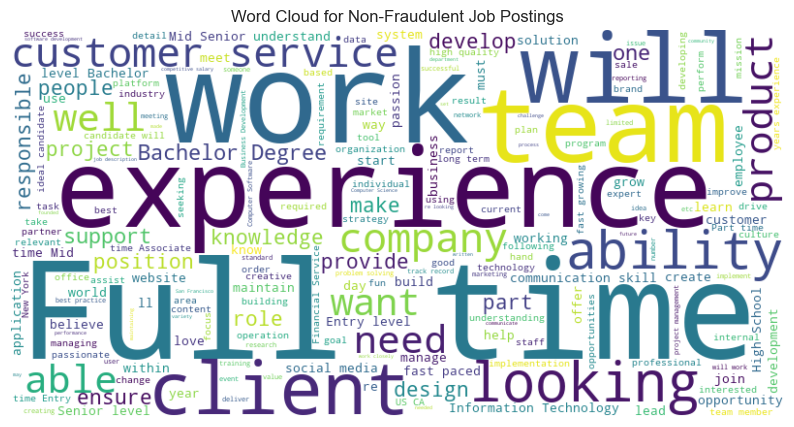

In [59]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_Real)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Fraudulent Job Postings')
plt.show()

In [60]:
text_Fake = ''.join(Fake['job_posting'])

In [61]:
text_Fake[:500]

'IC&E Technician US, , Stocton, CA Oil & Energy 95000-115000 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0Staffing &amp; Recruiting done right for the Oil &amp; Energy Industry!Represented candidates are automatically granted the following perks: Expert negotiations on your behalf, maximizing your compensation package and implimenting ongoing increases\xa0Significant signing bonus by Refined Resources (in addition to any potential signing bonuses our client compan'

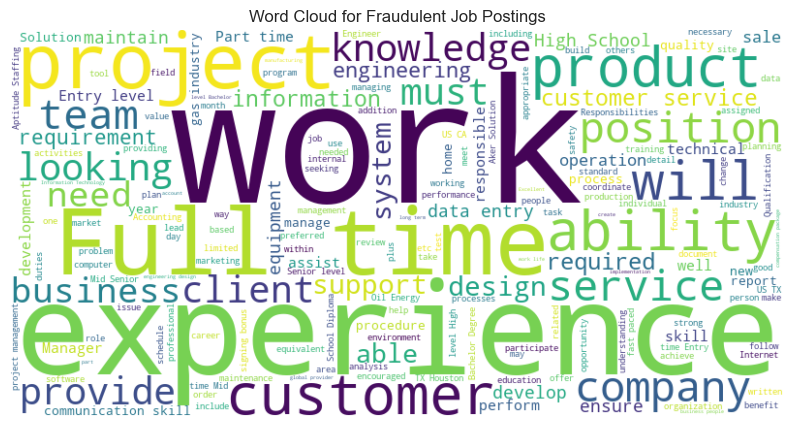

In [62]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_Fake)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fraudulent Job Postings')
plt.show()

### Tokenization

In [63]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [64]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
new_df['job_posting_tokens'] = new_df['job_posting'].apply(word_tokenize)

new_df['job_posting_sentences'] = new_df['job_posting'].apply(sent_tokenize)

In [66]:
new_df.head()

,job_posting,fraudulent,job_posting_tokens,job_posting_sentences
0,"Marketing Intern US, NY, New York Marketing 0 ...",0,"[Marketing, Intern, US, ,, NY, ,, New, York, M...","[Marketing Intern US, NY, New York Marketing 0..."
1,"Customer Service - Cloud Video Production NZ, ...",0,"[Customer, Service, -, Cloud, Video, Productio...","[Customer Service - Cloud Video Production NZ,..."
2,"Commissioning Machinery Assistant (CMA) US, IA...",0,"[Commissioning, Machinery, Assistant, (, CMA, ...","[Commissioning Machinery Assistant (CMA) US, I..."
3,"Account Executive - Washington DC US, DC, Wash...",0,"[Account, Executive, -, Washington, DC, US, ,,...","[Account Executive - Washington DC US, DC, Was..."
4,"Bill Review Manager US, FL, Fort Worth 0 0 Spo...",0,"[Bill, Review, Manager, US, ,, FL, ,, Fort, Wo...","[Bill Review Manager US, FL, Fort Worth 0 0 Sp..."


### Part of Speech

In [67]:
!pip install nltk pandas
import pandas as pd
from nltk import pos_tag, word_tokenize

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def pos_tagging(sentence):
    tokens = word_tokenize(sentence)
    tagged_tokens = pos_tag(tokens)
    return tagged_tokens

    new_df['job_posting_pos_tagged'] = new_df['job_posting_sentences'].apply(lambda x: [pos_tagging(sentence) for sentence in x])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [68]:
new_df.head()

,job_posting,fraudulent,job_posting_tokens,job_posting_sentences
0,"Marketing Intern US, NY, New York Marketing 0 ...",0,"[Marketing, Intern, US, ,, NY, ,, New, York, M...","[Marketing Intern US, NY, New York Marketing 0..."
1,"Customer Service - Cloud Video Production NZ, ...",0,"[Customer, Service, -, Cloud, Video, Productio...","[Customer Service - Cloud Video Production NZ,..."
2,"Commissioning Machinery Assistant (CMA) US, IA...",0,"[Commissioning, Machinery, Assistant, (, CMA, ...","[Commissioning Machinery Assistant (CMA) US, I..."
3,"Account Executive - Washington DC US, DC, Wash...",0,"[Account, Executive, -, Washington, DC, US, ,,...","[Account Executive - Washington DC US, DC, Was..."
4,"Bill Review Manager US, FL, Fort Worth 0 0 Spo...",0,"[Bill, Review, Manager, US, ,, FL, ,, Fort, Wo...","[Bill Review Manager US, FL, Fort Worth 0 0 Sp..."


### N-Grams

In [69]:
from nltk.util import ngrams

def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

n = 2

new_df['job_posting_ngrams'] = new_df['job_posting_tokens'].apply(lambda x: generate_ngrams(x, n))


In [70]:
new_df.head()

,job_posting,fraudulent,job_posting_tokens,job_posting_sentences,job_posting_ngrams
0,"Marketing Intern US, NY, New York Marketing 0 ...",0,"[Marketing, Intern, US, ,, NY, ,, New, York, M...","[Marketing Intern US, NY, New York Marketing 0...","[(Marketing, Intern), (Intern, US), (US, ,), (..."
1,"Customer Service - Cloud Video Production NZ, ...",0,"[Customer, Service, -, Cloud, Video, Productio...","[Customer Service - Cloud Video Production NZ,...","[(Customer, Service), (Service, -), (-, Cloud)..."
2,"Commissioning Machinery Assistant (CMA) US, IA...",0,"[Commissioning, Machinery, Assistant, (, CMA, ...","[Commissioning Machinery Assistant (CMA) US, I...","[(Commissioning, Machinery), (Machinery, Assis..."
3,"Account Executive - Washington DC US, DC, Wash...",0,"[Account, Executive, -, Washington, DC, US, ,,...","[Account Executive - Washington DC US, DC, Was...","[(Account, Executive), (Executive, -), (-, Was..."
4,"Bill Review Manager US, FL, Fort Worth 0 0 Spo...",0,"[Bill, Review, Manager, US, ,, FL, ,, Fort, Wo...","[Bill Review Manager US, FL, Fort Worth 0 0 Sp...","[(Bill, Review), (Review, Manager), (Manager, ..."


In [71]:
new_df.columns

Index(['job_posting', 'fraudulent', 'job_posting_tokens',
       'job_posting_sentences', 'job_posting_ngrams'],
      dtype='object')

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df['job_posting_tokens'], new_df['fraudulent'], test_size=0.2, random_state=42)

### Vectorize the text data

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

X_train_flattened = [' '.join(sublist) for sublist in X_train]

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_flattened)

X_test_flattened = [' '.join(sublist) for sublist in X_test]
X_test_vec = vectorizer.transform(X_test_flattened)

In [74]:
X_train_flattened[0]

"Medium/Heavy duty gas and diesel technician US , MA , Bourne service 41600-62400 0 Major 's RV the premier RV service center for the south shore , cape and islands is accepting applications for a medium/heavy duty gas and diesel technician to fill a full time year round position . Superior mechanical aptitude with sound diagnostic and reasoning skillsMassachusetts CDL . Class A or B , or willingness to attain oneMassachusetts State Inspection license , or willingness to attain oneAttention to detail and computer literacystrong customer service and communication skillsExcellent work , driving and safety recordwith a minimum of 5 years experience pr very aggressive pay package for the right candidatehealth insurance , uniforms and 401k matching controbution after two years Full-time Mid-Senior level Vocational Automotive Other"

In [75]:
X_train

5054     [Medium/Heavy, duty, gas, and, diesel, technic...
10649    [Junior, Account, Manager, GR, ,, I, ,, ATHENS...
10262    [Customer, Service, Associate, -, Part, Time, ...
7750     [Project, Manager, US, ,, CA, ,, San, Francisc...
17514    [Web, Graphic, Designer, GB, ,, NYK, ,, Scarbo...
                               ...                        
11415    [Online, Performance, Analyst, IL, ,, ,, Tel, ...
12107    [Database, Developer, SE, ,, I, ,, Visby, 0, 0...
5415     [Delivery, Driver, CA, ,, ON, ,, Concord, 0, 3...
863      [Python, ,, Oracle, ,, Teradata, ,, Java, (, J...
16035    [Reporter, ,, Agri, Investor, US, ,, NY, ,, Ne...
Name: job_posting_tokens, Length: 14079, dtype: object

In [76]:
print("Shape of X_train_vec:", X_train_vec.shape)
print("Number of samples in X_train:", X_train.shape[0])


print("Shape of X_test_vec:", X_test_vec.shape)
print("Number of samples in X_test:", X_test.shape[0])

Shape of X_train_vec: (14079, 93111)
Number of samples in X_train: 14079
Shape of X_test_vec: (3520, 93111)
Number of samples in X_test: 3520


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_train_vec, y_train, test_size=0.2, random_state=42)

In [ ]:
print(X_)

## LogisticRegression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.984375
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2692
           1       0.93      0.69      0.80       124

    accuracy                           0.98      2816
   macro avg       0.96      0.85      0.89      2816
weighted avg       0.98      0.98      0.98      2816

Confusion Matrix:
[[2686    6]
 [  38   86]]


In [80]:
X_test

<2816x93111 sparse matrix of type '<class 'numpy.int64'>'
	with 616574 stored elements in Compressed Sparse Row format>

In [81]:
print(X_test[972])

  (0, 5285)	3
  (0, 86041)	1
  (0, 71399)	1
  (0, 80821)	5
  (0, 32452)	3
  (0, 41013)	2
  (0, 81766)	7
  (0, 81417)	2
  (0, 88942)	2
  (0, 53946)	2
  (0, 52516)	2
  (0, 87031)	1
  (0, 38461)	3
  (0, 49822)	1
  (0, 4623)	1
  (0, 11860)	1
  (0, 62353)	1
  (0, 4989)	2
  (0, 42726)	1
  (0, 88671)	2
  (0, 54641)	1
  (0, 35973)	1
  (0, 51884)	1
  (0, 90159)	3
  (0, 88765)	2
  :	:
  (0, 34238)	4
  (0, 72027)	1
  (0, 68367)	1
  (0, 12650)	4
  (0, 80801)	1
  (0, 29319)	1
  (0, 1432)	3
  (0, 49069)	1
  (0, 52959)	2
  (0, 33149)	1
  (0, 86043)	1
  (0, 36260)	1
  (0, 18815)	1
  (0, 48898)	2
  (0, 89768)	1
  (0, 20810)	1
  (0, 126)	1
  (0, 74494)	1
  (0, 69910)	1
  (0, 87042)	1
  (0, 77462)	1
  (0, 78818)	1
  (0, 45859)	1
  (0, 86026)	1
  (0, 57231)	1


In [87]:
X_test.shape

(2816, 93111)

In [82]:
input_text=["customer service associate us, ca, san francisco novitex enterprise solutions, formerly pitney bowes management services, delivers innovative document communications management solutions help companies around world drive business process efficiencies, increase productivity, reduce costs improve customer satisfaction. almost 30 years, clients turned us integrate optimize enterprise-wide business processes empower employees, increase productivity maximize results. trusted partner, continually focus delivering secure, technology-enabled document communications solutions improve clients' work processes, enhance customer interactions drive growth. customer service associate based san francisco, ca. right candidate integral part talented team, supporting continued growth.responsibilities:perform various mail center activities (sorting, metering, folding, inserting, delivery, pickup, etc.)lift heavy boxes, files paper neededmaintain highest levels customer care demonstrating friendly cooperative attitudedemonstrate flexibility satisfying customer demands high volume, production environmentconsistently adhere business procedure guidelinesadhere safety procedurestake direction supervisor site managermaintain logs reporting documentation; attention detailparticipate cross-training perform duties assigned (filing, outgoing shipments, etc)operating mailing, copy scanning equipmentshipping & receivinghandle time-sensitive material like confidential, urgent packagesperform tasks assignedscanning incoming mail recipientsperform file purges pullscreate files ship filesprovide backfill neededenter information daily spreadsheetsidentify charges match billingsort deliver mail, small packages minimum requirements:minimum 6 months customer service related experience requiredhigh school diploma equivalent (ged) requiredpreferred qualifications:keyboarding windows environment pc skills required (word, excel powerpoint preferred)experience running mail posting equipment plusexcellent communication skills verbal writtenlifting 55 lbs without accommodationswillingness availability work additional hours assignedwillingness submit pre-employment drug screening criminal background checkability effectively work individually team environmentcompetency performing multiple functional tasksability meet employer's attendance policy computer software"]   

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
vect.fit(Real['job_posting'])

TfidfVectorizer()

## Decision Tree

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier 

vect = TfidfVectorizer()
vect.fit(Real['job_posting'])

input_data_features = vect.transform(input_text)


dt = DecisionTreeClassifier() 

y = Real['fraudulent'] 
dt.fit(vect.transform(Real['job_posting']), y)  

prediction = dt.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Fraudulant Job')

else:
  print('Real Job')

[0]
Real Job


In [85]:

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[2686    6]
 [  38   86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2692
           1       0.93      0.69      0.80       124

    accuracy                           0.98      2816
   macro avg       0.96      0.85      0.89      2816
weighted avg       0.98      0.98      0.98      2816

